# Modelado Estocástico
## Clase 4 - Análisis detallado de los valores de la Regresión Lineal de statsmodel.

Como vimos en clase, para utilizar regresiones lineales podemos importar tanto `statsmodels.api` como `statsmodels.formula.api`.
En el Notebook vamos a implementar ambas. Poseen algunas diferencias, la sintaxis de las fórmulas en `statsmodels.api` es matricial, utilizano arrays o DataFrames mientras que en `statsmodel.formula.api` es a través de strings (al estilo de R) y solo con DFs.
(Para más información puede consultarse la documentación de statsmodel [https://www.statsmodels.org/stable/api.html])

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats


Carga del archivo `ceo.xlsx` disponible en la carpeta **Bases de Datos** del Campus.

In [ ]:
df = pd.read_excel('ceo.xlsx')
print(df.head())

   Ganancias  Compensacion_CEO
0      357.0               0.7
1       48.0               0.7
2      932.0               0.8
3      366.0               0.7
4       83.0               0.8


- Utilizamos el modelo OLS(_Ordinary Least Squares_) de statsmodel para crear el modelo de regresión lineal. Y analizamos sus valores. Para el primer ejemplo lo vamos a generar utilizando `statsmodel.api` con la sintaxis usual.
Incorporamos los interceptos con `add_constant` para agregar la columna de unos a X. Dado que `statsmodel.api` no la estima automáticamente si no se la incluye explícitamente el ajuste resultante puede ser incorrecto.

In [ ]:
X = sm.add_constant(df["Ganancias"])
y = df["Compensacion_CEO"]
modelo1 = sm.OLS(y, X).fit()

modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Compensacion_CEO   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     52.24
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           5.50e-10
Time:                        23:08:45   Log-Likelihood:                -73.655
No. Observations:                  70   AIC:                             151.3
Df Residuals:                      68   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6000      0.112      5.342      0.000       0.376       0.824
Ganancias      0.0008      0.000      7.228      0.000       0.001       0.001
==============================================================================
Omnibus:                       21.745   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.165
Skew:                           1.136   Prob(JB):                     1.40e-08
Kurtosis:                       5.691   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X

,const,Ganancias
0,1.0,357.0
1,1.0,48.0
2,1.0,932.0
3,1.0,366.0
4,1.0,83.0
...,...,...
65,1.0,327.0
66,1.0,409.0
67,1.0,117.0
68,1.0,179.0


- En `statsmodels.formula.api` los datos para correr el modelo se indican con la sintaxis `'Columna_y ~ Columna_X'`, y no es necesario agregar el intercepto de forma explícita.

In [ ]:
model = smf.ols('Compensacion_CEO ~ Ganancias', data = df)   # con constante por defecto
regresion = model.fit()
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Compensacion_CEO   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     52.24
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           5.50e-10
Time:                        23:08:45   Log-Likelihood:                -73.655
No. Observations:                  70   AIC:                             151.3
Df Residuals:                      68   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6000      0.112      5.342      0.000       0.376       0.824
Ganancias      0.0008      0.000      7.228      0.000       0.001       0.001
==============================================================================
Omnibus:                       21.745   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.165
Skew:                           1.136   Prob(JB):                     1.40e-08
Kurtosis:                       5.691   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Obviamente, obtuvimos los mismos resultados. De hecho, si observamos las clases de los modelos generados vamos a ver que son las mismas, pudiendo utilizarlos con los mismos métodos más allá de cómo fueron generados.

In [ ]:
type(modelo1)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [ ]:
type(regresion)

statsmodels.regression.linear_model.RegressionResultsWrapper

### Los estimadores de la regresión están guardados en la Serie `regresion.params`

In [ ]:
regresion.params

,0
Intercept,0.599965
Ganancias,0.000842


El intercepto (u ordenada al origen) podrá observarse en `regresion.params['Intercept']` y la pendiente en el parámetro con el nombre de la columna con los datos ingresados en X, en este caso, `Ganancias`.

In [ ]:
print(f"Intercepto: {regresion.params['Intercept']} \nPendiente: {regresion.params['Ganancias']}")

Intercepto: 0.5999648988232877 
Pendiente: 0.0008423268484880064


### Descomposición de la suma de cuadrados
$
\text{RSS} = \text{TSS} - \text{ESS}
$

$
\sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n}(y_i - \bar{y})^2 - \hat{\beta}^2 \sum_{i=1}^{n}(x_i - \bar{x})^2
$

donde:

- $\text{RSS}$ = Residual Sum of Squares
- $\text{TSS}$ = Total Sum of Squares
- $\text{ESS}$ = Explained Sum of Squares


In [ ]:
tss = regresion.centered_tss
ess = regresion.ess
rss = regresion.ssr
print(f"TSS: {tss} \nESS: {ess} \nRSS: {rss}")

TSS: 59.44585714285713 
ESS: 25.82797005571605 
RSS: 33.61788708714108


Podemos validar que la diferencia entre TSS y ESS sea efectivamente la RSS obtenida:

In [ ]:
tss-ess

np.float64(33.61788708714108)

### $R^2$
A continuación vamos a ver cómo obtener el $R^2$ (R cuadrado) de diferentes formas:

El que guarda el modelo:

In [ ]:
regresion.rsquared


np.float64(0.43447889049101684)

Por definición:

In [ ]:
ess/tss

np.float64(0.4344788904910168)

Utilizando  $ESS = TSS - RSS$

In [ ]:
1 - rss / tss

np.float64(0.43447889049101684)

Utilizando la correlación real entre `y` y `y_hat`

Recordemos que $\hat{y}$  (`y_hat`) es el valor predicho de $y$. Podemos utilizar `.fittedvalues` para obtenerlo

In [ ]:
y_hat = regresion.fittedvalues
y_hat.head()

,0
0,0.900676
1,0.640397
2,1.385014
3,0.908257
4,0.669878


Cuadrado de la correlación real entre `y` y `y_hat`:

In [ ]:
correlacion = np.corrcoef(y, y_hat)[0, 1]
correlacion ** 2

np.float64(0.434478890491017)

### Estimador $s^2$ del parámetro $\sigma^2$

In [ ]:
regresion.scale

np.float64(0.494380692457957)

Calculado como   $s^2 = RSS / (n - k)$:

In [ ]:
rss/regresion.df_resid

np.float64(0.494380692457957)

Cuya raíz cuadrada es el desvío estándar $\sigma$:


In [ ]:
np.sqrt(regresion.scale)

np.float64(0.7031221035196924)

### Residuos

In [ ]:
regresion.resid

,0
0,-0.200676
1,0.059603
2,-0.585014
3,-0.208257
4,0.130122
...,...
65,-0.275406
66,0.755523
67,1.701483
68,-0.350741


O, manualmente:

In [ ]:
y - y_hat

,0
0,-0.200676
1,0.059603
2,-0.585014
3,-0.208257
4,0.130122
...,...
65,-0.275406
66,0.755523
67,1.701483
68,-0.350741


### Verificamos que se cumplen las CPO del problema de MCO (OLS):

a. La suma de los residuos es cero (y consecuentemente, tambien su media):

In [ ]:
regresion.resid.sum()

np.float64(2.353672812205332e-14)

In [ ]:
regresion.resid.mean()

np.float64(3.3623897317219026e-16)

b. Los residuos no estan correlacionados con X ('Ganancias').

  Obtengo nombres, valores y armo el DF dfX, incluyendo los residuos.

In [ ]:
col_names = regresion.model.exog_names
col_names

['Intercept', 'Ganancias']

In [ ]:
values = regresion.model.exog
values[:10]

array([[  1., 357.],
       [  1.,  48.],
       [  1., 932.],
       [  1., 366.],
       [  1.,  83.],
       [  1.,  22.],
       [  1.,  67.],
       [  1., 413.],
       [  1., 496.],
       [  1., 458.]])

In [ ]:
dfX = pd.DataFrame(regresion.model.exog, columns=col_names)
dfX['res'] = regresion.resid
dfX

,Intercept,Ganancias,res
0,1.0,357.0,-0.200676
1,1.0,48.0,0.059603
2,1.0,932.0,-0.585014
3,1.0,366.0,-0.208257
4,1.0,83.0,0.130122
...,...,...,...
65,1.0,327.0,-0.275406
66,1.0,409.0,0.755523
67,1.0,117.0,1.701483
68,1.0,179.0,-0.350741


### Covarianza entre N y los residuos, debe dar 0. (En este caso su orden de magnitud es $10^{-14}$, una aproximación más que razonable a 0)

In [ ]:
dfX.cov().loc['Ganancias', 'res']

np.float64(-5.876665108716543e-14)

- Graficamos Residuos vs Ganancias:

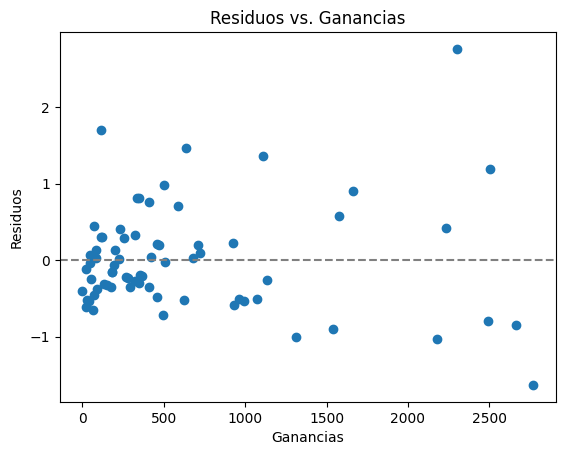

In [ ]:
plt.scatter(df["Ganancias"], regresion.resid)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Ganancias")
plt.ylabel("Residuos")
plt.title("Residuos vs. Ganancias")
plt.show()

 - Graficamos la recta estimada:

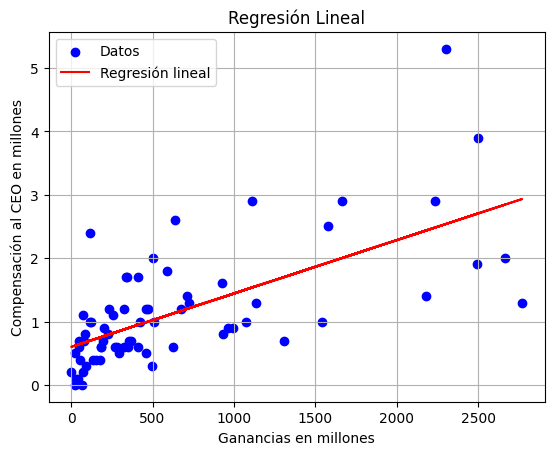

In [ ]:
predicts = regresion.predict(X)
plt.scatter(df['Ganancias'], y, label = 'Datos', color='blue')
plt.plot(df['Ganancias'], predicts, color='red', label='Regresión lineal')
plt.xlabel('Ganancias en millones')
plt.ylabel('Compensación al CEO en millones')
plt.title('Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

### Valor predicho de `Comp_CEO` para un valor de Ganancias particular, por ejemplo, para 500 millones de ganancias:

Utilizando el desarrollo "manual":

In [ ]:
intercepto = regresion.params['Intercept']
pendiente = regresion.params['Ganancias']
Ganancias_valor = 500

y_hat_500 = intercepto + pendiente * Ganancias_valor
y_hat_500

np.float64(1.021128323067291)

Utilizando el predictor:

In [ ]:
nuevo_Ganancias = pd.DataFrame({'Ganancias':[500]})
y_hat2 = regresion.predict(nuevo_Ganancias)
y_hat2

,0
0,1.021128


Utilizando el vector de coeficientes estimados:

In [ ]:
beta = regresion.params

nuevo_punto = [1, 500]
np.dot(nuevo_punto, beta)

np.float64(1.021128323067291)

### Matriz de varianzas y Covarianzas de los beta_sombrero
Statsmodels guarda las varianzas y covarianzas de los estimadores

In [ ]:
regresion.cov_params()

,Intercept,Ganancias
Intercept,0.012615,-8.684073e-06
Ganancias,-0.000009,1.358102e-08


Notar que en `regresion.summary` vemos los Std Err en la segunda columna, que es la raiz de la varianza ($\sqrt{0.012615}=0.112$)

In [ ]:
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Compensacion_CEO   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     52.24
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           5.50e-10
Time:                        23:08:46   Log-Likelihood:                -73.655
No. Observations:                  70   AIC:                             151.3
Df Residuals:                      68   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6000      0.112      5.342      0.000       0.376       0.824
Ganancias      0.0008      0.000      7.228      0.000       0.001       0.001
==============================================================================
Omnibus:                       21.745   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.165
Skew:                           1.136   Prob(JB):                     1.40e-08
Kurtosis:                       5.691   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Standard Errors

In [ ]:
regresion.bse

,0
Intercept,0.112318
Ganancias,0.000117


### Y sombrero e intervalo de confianza para Y sombrero (Banda de confianza Y Banda de predicción)
Cálculo de un IC para el y_hat $\bar{y}$  y un IC para "y" (un "y" futuro)

In [ ]:
pred = regresion.get_prediction()
IC_pred = pred.summary_frame(alpha = 0.05)

In [ ]:
IC_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.900676,0.090254,0.720576,1.080776,-0.513895,2.315246
1,0.640397,0.108688,0.423514,0.857280,-0.779326,2.060119
2,1.385014,0.090692,1.204040,1.565987,-0.029668,2.799695
3,0.908257,0.089877,0.728909,1.087604,-0.506218,2.322731
4,0.669878,0.106148,0.458063,0.881693,-0.749079,2.088835


Recordemos que `np.allclose` compara dos valores o arrays y devuelve `True` si están dentro de un umbral de tolerancia especificado. Por ejemplo, si cotejamos `IC_pred['mean]` del `summary_frame` con $\bar{y}$:

In [ ]:
np.allclose(IC_pred['mean'], y_hat)

True

Replicamos _a mano_ cada columna del summary_frame. La primera columna es el $\hat{y}$, el valor sobre la recta estimada dado x.

La segunda columna será el Standard Error del $\hat{y}$.
Para obtenerlo:
1. Obtenemos la varianza del $\hat{y}$

Sabemos que

$\hat{y} = \hat{\alpha} + \hat{\beta} x$

Y que

$
\operatorname{Var}(\hat{y}) = \operatorname{Var}(\hat{\alpha}) + x^2  \operatorname{Var}(\hat{\beta}) + 2x  \operatorname{Cov}(\hat{\alpha}, \hat{\beta})
$


In [ ]:
regresion.cov_params()

,Intercept,Ganancias
Intercept,0.012615,-8.684073e-06
Ganancias,-0.000009,1.358102e-08


In [ ]:
params = regresion.cov_params().values
params

array([[ 1.26154123e-02, -8.68407339e-06],
       [-8.68407339e-06,  1.35810239e-08]])

In [ ]:
var_y_hat = params[0,0] + params[1,1]*(df['Ganancias']**2) + 2*df['Ganancias']*params[1,0]
var_y_hat.head()

,Ganancias
0,0.008146
1,0.011813
2,0.008225
3,0.008078
4,0.011267


2. Calculo standard error (al $\hat{y}$), correspondiente a la segunda columna `mean_se` del `summary_frame`. Luego, las cotejo:

In [ ]:
se_y_hat=var_y_hat**0.5
np.allclose(IC_pred['mean_se'], se_y_hat)


True

La tercera y cuarta columnas son la BANDA DE CONFIANZA de $\hat{y}$ del 95%.

Grados de libertad $n - k$:

In [ ]:
dfreed = regresion.df_resid
alpha = 0.05
t_val = stats.t.ppf(1 - alpha/2, dfreed)
IC_y_hat_low = y_hat - t_val * se_y_hat
IC_y_hat_up  = y_hat + t_val * se_y_hat

Cotejo las tercera y cuarta columnas:

In [ ]:
np.allclose(IC_pred['mean_ci_lower'], IC_y_hat_low)

True

In [ ]:
np.allclose(IC_pred['mean_ci_upper'], IC_y_hat_up)

True

Las últimas dos columnas, quinta y sexta, son LA BANDA DE PREDICCIÓN

Agregan la varianza del residuo ($e$):

$y = \hat{y} + e$

Y la varianza de $y$:

$\operatorname{Var}(y) = \operatorname{Var}(\hat{y}) + \operatorname{Var}(e)$

Donde $\operatorname{Var}(e)$ es `regresion.mse_resid`, que es `regresion.scale` que es $s^2$, el estimador de sigma cuadrado) dividido ($n-k$)

In [ ]:
sigma2_hat = regresion.mse_resid
se_pred = (var_y_hat + sigma2_hat) ** 0.5

IC_y_pred_low = y_hat - t_val * se_pred
IC_y_pred_up  = y_hat + t_val * se_pred

Cotejamos la quinta columna:

In [ ]:
np.allclose(IC_pred['obs_ci_lower'], IC_y_pred_low)

True

Y la sexta columna:

In [ ]:
np.allclose(IC_pred['obs_ci_upper'], IC_y_pred_up)

True

### Gráfico del IC de la BANDA DE CONFIANZA y de la BANDA DE PREDICCION

In [ ]:
Y = df['Compensacion_CEO']
X = sm.add_constant(df[['Ganancias']])

pred = regresion.get_prediction()
IC_pred = pred.summary_frame(alpha = 0.05)

Tomamos las columnas de interés:

In [ ]:
yhat = IC_pred['mean']
mean_ci_lower = IC_pred['mean_ci_lower']
mean_ci_upper = IC_pred['mean_ci_upper']
obs_ci_lower  = IC_pred['obs_ci_lower']
obs_ci_upper  = IC_pred['obs_ci_upper']

Graficamos:

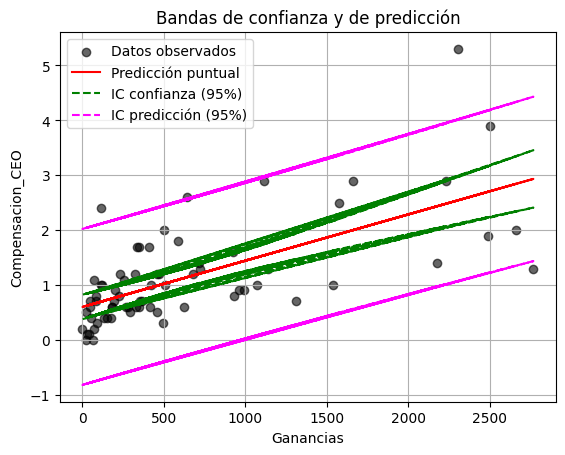

In [ ]:
plt.scatter(X['Ganancias'], Y, label='Datos observados', color='black', alpha=0.6)
plt.plot(X['Ganancias'], yhat, color='red', label='Predicción puntual')
plt.plot(X['Ganancias'], mean_ci_lower, color='green', linestyle='--', label='IC confianza (95%)')
plt.plot(X['Ganancias'], mean_ci_upper, color='green', linestyle='--')
plt.plot(X['Ganancias'], obs_ci_lower, color='magenta', linestyle='--', label='IC predicción (95%)')
plt.plot(X['Ganancias'], obs_ci_upper, color='magenta', linestyle='--')


plt.xlabel('Ganancias')
plt.ylabel('Compensacion_CEO')
plt.title('Bandas de confianza y de predicción')
plt.legend()
plt.grid(True)
plt.show()